In [2]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_excel(r"C:\Users\Sharvaree\Downloads\CP2\PM India Speeches.xlsx")
data.head()

,Text
0,"Your Highnesses,"
1,"Excellencies,"
2,Namaskar!
3,NaN
4,"Before starting the formal proceedings, on beh..."


# Data Cleaning or Pre-Processing

### Identifying & Treatment Missing Value

In [4]:
data.isnull().sum()

Text    160
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.isnull().sum()

Text    0
dtype: int64

# Step 1 :- Lower case

In [7]:
data.iloc[35,0]  # [row index , column index ]

'India is a land of diversity of faith, spirituality and traditions. Many major religions of the world were born here, and every religion of the world has found respect here.'

In [8]:
data.Text = data.Text.str.lower()

In [9]:
data.iloc[35,0] 

'india is a land of diversity of faith, spirituality and traditions. many major religions of the world were born here, and every religion of the world has found respect here.'

# Remove url

In [10]:
data.iloc[11,0]

'‘the welfare and happiness of humanity should always be ensured.’'

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [11]:
data.Text = data.Text.str.replace(r'http\S+|www.\S+','',case=False)  # | = or 
data.iloc[11,0]

'‘the welfare and happiness of humanity should always be ensured.’'

# Step 2 :- Punctuation

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt 

In [14]:
data.iloc[40,0]

'keeping in mind the challenge of climate change, energy transition is a significant need of the 21st century world. trillions of dollars are required for an inclusive energy transition. naturally, developed countries play a very crucial role in this.'

In [15]:
data.Text = data.Text.apply(lambda x : remove_punctuation(x))  # x = Text 

In [16]:
data.iloc[40,0]

'keeping in mind the challenge of climate change energy transition is a significant need of the 21st century world trillions of dollars are required for an inclusive energy transition naturally developed countries play a very crucial role in this'

# Remove Number

In [17]:
data.iloc[45,0]

'today the need of the hour is that all countries should work together in the field of fuel blending our proposal is to take an initiative at a globallevel to take ethanol blending in petrol up to 20 percent'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [18]:
data['Text'] = data['Text'].str.replace('\d+','')  # data.text  or data['text']

In [19]:
data.iloc[45,0]

'today the need of the hour is that all countries should work together in the field of fuel blending our proposal is to take an initiative at a globallevel to take ethanol blending in petrol up to  percent'

# Removing Stop Words

In [20]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharvaree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data.iloc[40,0]

'keeping in mind the challenge of climate change energy transition is a significant need of the st century world trillions of dollars are required for an inclusive energy transition naturally developed countries play a very crucial role in this'

In [22]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Text'] = data['Text'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [23]:
data.iloc[40,0]

'keeping mind challenge climate change energy transition significant need st century world trillions dollars required inclusive energy transition naturally developed countries play crucial role'

# Common Words

* manually created as per the case study

In [24]:
data.iloc[41,0]

'along india countries global south pleased developed countries taken positive initiative year developed countries expressed willingness fulfill commitment billion dollars climate finance first time'

In [25]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sharvaree\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'spiteproof',
 'Mirana',
 'departmentally',
 'paleodendrologist',
 'undiscriminatingness',
 'underseas',
 'talebearing',
 'carcinoma',
 'meteorize',
 'balaenid',
 'tarradiddle',
 'drenching',
 'belonosphaerite',
 'effectless',
 'ministeriable',
 'zerda',
 'remunerable',
 'puck',
 'subhouse',
 'tigerism',
 'parentheticalness',
 'Vespoidea',
 'nonevident',
 'unoffendingly',
 'misassign',
 'crawleyroot',
 'furnacelike',
 'betters',
 'Taluche',
 'vanisher',
 'pulghere',
 'forward',
 'otterhound',
 'pantler',
 'astelic',
 'disproportionality',
 'bauson',
 'somatotyper',
 'udell',
 'palfreyed',
 'medullar',
 'unextinguished',
 'unfumigated',
 'peroxidize',
 'joaquinite',
 'misconceiver',
 'dalar',
 'Safi',
 'preterroyal',
 'pregenial',
 'sedimentous',
 'Anselmian',
 'pyonephrotic',
 'mammectomy',
 'venditate',
 'whether',
 'anal',
 'benzoiodohydrin',
 'imploratory',
 'classifiable',
 'intermediate',
 'lactocitrate',
 'dashed',
 'vaginomycosis',
 'coccigenic',
 'lapicide',
 'panbabylonism',


In [26]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [27]:
data.iloc[41,0]

'along india countries global south pleased developed countries taken positive initiative year developed countries expressed willingness fulfill commitment billion dollars climate finance first time'

In [28]:
data = pd.DataFrame(data.Text.apply(lambda x: clean_text_round2(x)))
data.iloc[41,0]

'along global south taken positive initiative year expressed willingness fulfill commitment billion climate finance first time'

# Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sharvaree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [31]:
data.iloc[41,0]

'along global south taken positive initiative year expressed willingness fulfill commitment billion climate finance first time'

In [32]:
data.Text = data.Text.apply(lambda x :' '.join(lemmatize_text(x)))


In [33]:
data.iloc[41,0]

'along global south take positive initiative year express willingness fulfill commitment billion climate finance first time'

# Strip extra whitespace

In [34]:
data.iloc[41,0]

'along global south take positive initiative year express willingness fulfill commitment billion climate finance first time'

In [35]:
data['Text'] = (data['Text'].astype("str").str.rstrip())

In [36]:
data.iloc[41,0]

'along global south take positive initiative year express willingness fulfill commitment billion climate finance first time'

### Finished Data Cleaning

In [37]:
data=data.drop_duplicates('Text')
data

,Text
0,
4,start formal behalf would like express heartfe...
9,president warm welcome
11,place today away pillar nearly two half thousa...
16,mean
...,...
323,hope join
328,officially conclude summit
330,may path toward one earth one family one futur...
334,let hope peace entire world


# Term Document Matrix

In [38]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
accelerate,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accordance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
achieve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,freq
accelerate,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
accordance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
achieve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,125,126,127,128,129,130,131,132,133,freq
0,accelerate,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,access,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accordance,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,achieve,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
195,global,38
504,world,24
464,today,20
169,family,19
114,development,11
308,new,10
463,time,10
273,make,9
242,initiative,9
201,green,8


In [42]:
bar = tdm1.head(10)

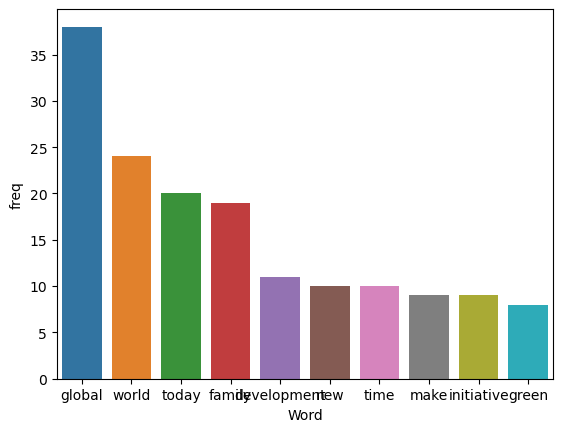

In [43]:
import seaborn as sns
fg = sns.barplot(x='Word', y='freq',data=bar)

In [44]:
text = " ".join(review for review in data.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 8909 words in the combination of all review.


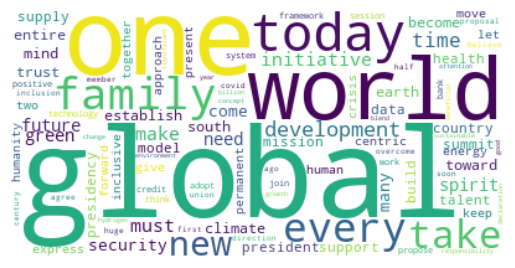

In [45]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

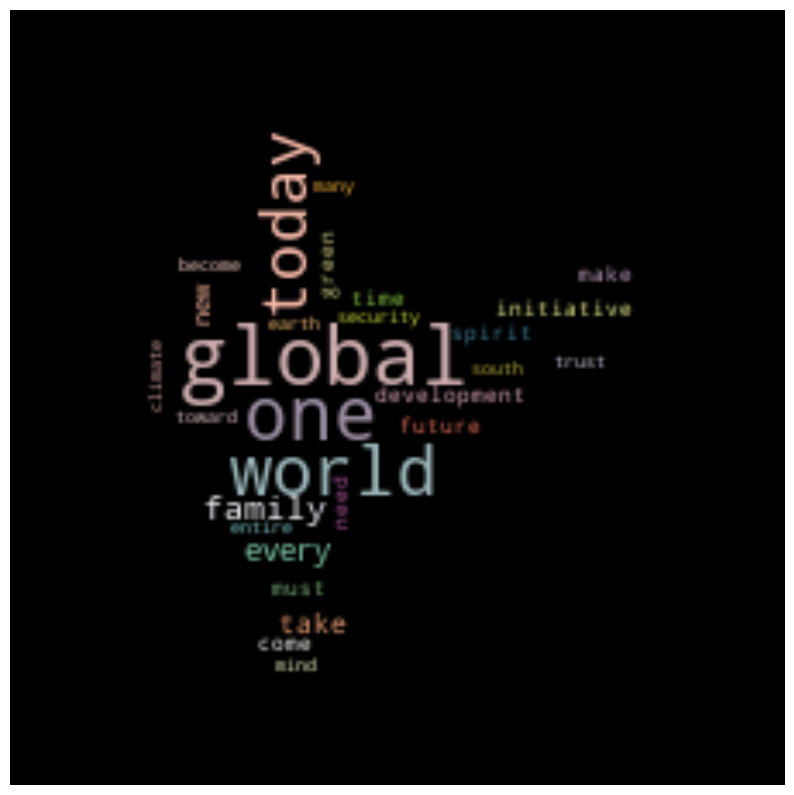

In [46]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open(r"C:\Users\Sharvaree\OneDrive\Pictures\Saved Pictures\images.jpg")) # shape & colour
abc = WordCloud(stopwords=stopwords,
                           background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=500, 
                           mask=mask,  ### shape of leaf
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour OF leaf
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

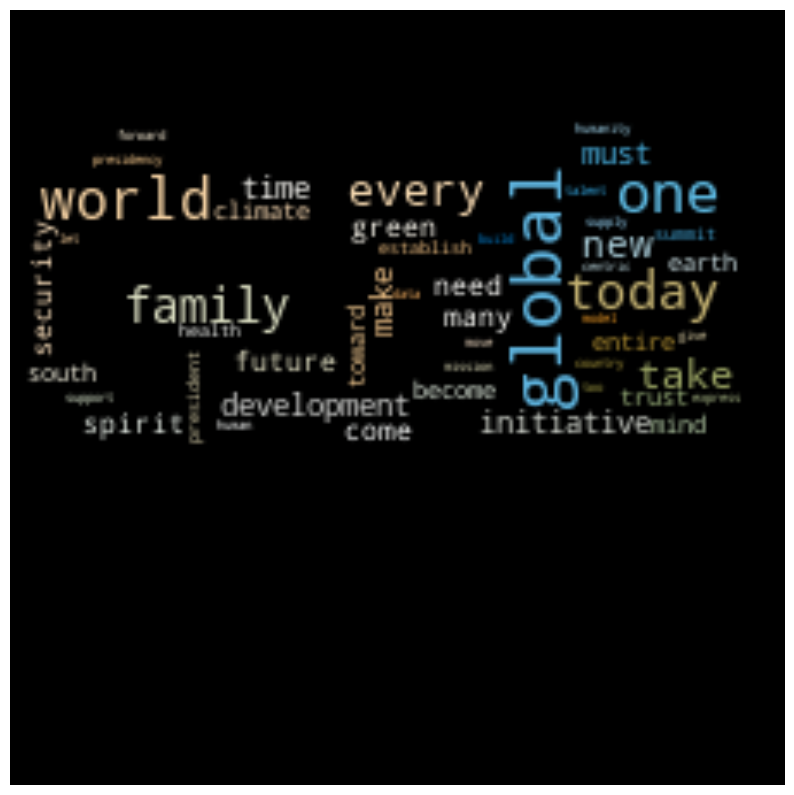

In [47]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open(r"C:\Users\Sharvaree\OneDrive\Pictures\Saved Pictures\g2o...jpg")) # shape & colour
abc = WordCloud(stopwords=stopwords,
                           background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=500, 
                           mask=mask,  ### shape of leaf
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour OF leaf
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

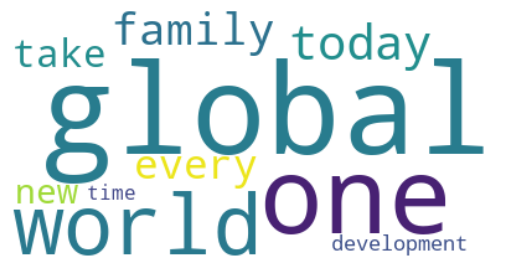

In [48]:
## collocations=False means try to contro the duplicate keyword and counts as 1

# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [49]:
data

,Text
0,
4,start formal behalf would like express heartfe...
9,president warm welcome
11,place today away pillar nearly two half thousa...
16,mean
...,...
323,hope join
328,officially conclude summit
330,may path toward one earth one family one futur...
334,let hope peace entire world


In [50]:
data = data.drop_duplicates('Text') 
data

,Text
0,
4,start formal behalf would like express heartfe...
9,president warm welcome
11,place today away pillar nearly two half thousa...
16,mean
...,...
323,hope join
328,officially conclude summit
330,may path toward one earth one family one futur...
334,let hope peace entire world


In [51]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity        # polarity range -1 to +1
data['polarity'] = data['Text'].apply(pol)
data.head(5)

,Text,polarity
0,,0.000000
4,start formal behalf would like express heartfe...,-0.060000
9,president warm welcome,0.700000
11,place today away pillar nearly two half thousa...,0.011111
16,mean,-0.312500


In [53]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Text,polarity,Sentiment
0,,0.000000,Positive
4,start formal behalf would like express heartfe...,-0.060000,Negative
9,president warm welcome,0.700000,Positive
11,place today away pillar nearly two half thousa...,0.011111,Positive
16,mean,-0.312500,Negative


<Axes: >

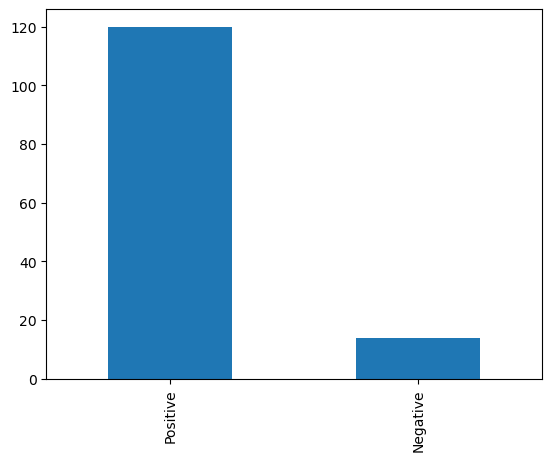

In [54]:
data.Sentiment.value_counts().plot.bar()

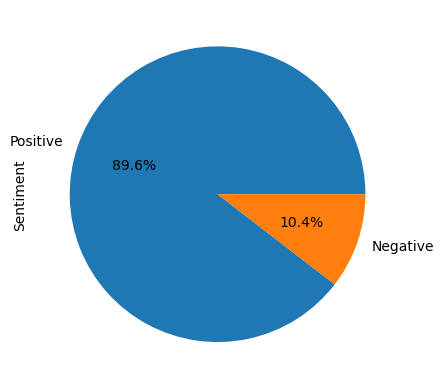

In [55]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");